In [10]:
%matplotlib inline


***********
Usage Guide
***********

This tutorial covers some basic usage patterns and best-practices to
help you get started with Matplotlib.


General Concepts
================

:mod:`matplotlib` has an extensive codebase that can be daunting to many
new users. However, most of matplotlib can be understood with a fairly
simple conceptual framework and knowledge of a few important points.

Plotting requires action on a range of levels, from the most general
(e.g., 'contour this 2-D array') to the most specific (e.g., 'color
this screen pixel red'). The purpose of a plotting package is to assist
you in visualizing your data as easily as possible, with all the necessary
control -- that is, by using relatively high-level commands most of
the time, and still have the ability to use the low-level commands when
needed.

Therefore, everything in matplotlib is organized in a hierarchy. At the top
of the hierarchy is the matplotlib "state-machine environment" which is
provided by the :mod:`matplotlib.pyplot` module. At this level, simple
functions are used to add plot elements (lines, images, text, etc.) to
the current axes in the current figure.

<div class="alert alert-info"><h4>Note</h4><p>Pyplot's state-machine environment behaves similarly to MATLAB and
   should be most familiar to users with MATLAB experience.</p></div>

The next level down in the hierarchy is the first level of the object-oriented
interface, in which pyplot is used only for a few functions such as figure
creation, and the user explicitly creates and keeps track of the figure
and axes objects. At this level, the user uses pyplot to create figures,
and through those figures, one or more axes objects can be created. These
axes objects are then used for most plotting actions.

For even more control -- which is essential for things like embedding
matplotlib plots in GUI applications -- the pyplot level may be dropped
completely, leaving a purely object-oriented approach.



In [15]:
# sphinx_gallery_thumbnail_number = 3
import matplotlib.pyplot as plt
import numpy as np
from math import *
import scipy

print('System:Status = All Green')

System:Status = All Green



Parts of a Figure
=================

![](../../_static/anatomy.png)



:class:`~matplotlib.figure.Figure`
----------------------------------

The **whole** figure.  The figure keeps
track of all the child :class:`~matplotlib.axes.Axes`, a smattering of
'special' artists (titles, figure legends, etc), and the **canvas**.
(Don't worry too much about the canvas, it is crucial as it is the
object that actually does the drawing to get you your plot, but as the
user it is more-or-less invisible to you).  A figure can have any
number of :class:`~matplotlib.axes.Axes`, but to be useful should have
at least one.

The easiest way to create a new figure is with pyplot:



<Figure size 432x288 with 0 Axes>

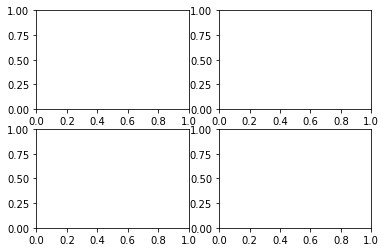

In [3]:
fig = plt.figure()  # an empty figure with no axes
fig.suptitle('No axes on this figure')  # Add a title so we know which it is

fig, ax_lst = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

:class:`~matplotlib.axes.Axes`
------------------------------

This is what you think of as 'a plot', it is the region of the image
with the data space. A given figure
can contain many Axes, but a given :class:`~matplotlib.axes.Axes`
object can only be in one :class:`~matplotlib.figure.Figure`.  The
Axes contains two (or three in the case of 3D)
:class:`~matplotlib.axis.Axis` objects (be aware of the difference
between **Axes** and **Axis**) which take care of the data limits (the
data limits can also be controlled via set via the
:meth:`~matplotlib.axes.Axes.set_xlim` and
:meth:`~matplotlib.axes.Axes.set_ylim` :class:`Axes` methods).  Each
:class:`Axes` has a title (set via
:meth:`~matplotlib.axes.Axes.set_title`), an x-label (set via
:meth:`~matplotlib.axes.Axes.set_xlabel`), and a y-label set via
:meth:`~matplotlib.axes.Axes.set_ylabel`).

The :class:`Axes` class and it's member functions are the primary entry
point to working with the OO interface.

:class:`~matplotlib.axis.Axis`
------------------------------

These are the number-line-like objects. They take
care of setting the graph limits and generating the ticks (the marks
on the axis) and ticklabels (strings labeling the ticks).  The
location of the ticks is determined by a
:class:`~matplotlib.ticker.Locator` object and the ticklabel strings
are formatted by a :class:`~matplotlib.ticker.Formatter`.  The
combination of the correct :class:`Locator` and :class:`Formatter` gives
very fine control over the tick locations and labels.

:class:`~matplotlib.artist.Artist`
----------------------------------

Basically everything you can see on the figure is an artist (even the
:class:`Figure`, :class:`Axes`, and :class:`Axis` objects).  This
includes :class:`Text` objects, :class:`Line2D` objects,
:class:`collection` objects, :class:`Patch` objects ... (you get the
idea).  When the figure is rendered, all of the artists are drawn to
the **canvas**.  Most Artists are tied to an Axes; such an Artist
cannot be shared by multiple Axes, or moved from one to another.


Types of inputs to plotting functions
=====================================

All of plotting functions expect `np.array` or `np.ma.masked_array` as
input.  Classes that are 'array-like' such as `pandas` data objects
and `np.matrix` may or may not work as intended.  It is best to
convert these to `np.array` objects prior to plotting.

For example, to convert a `pandas.DataFrame` ::

  a = pandas.DataFrame(np.random.rand(4,5), columns = list('abcde'))
  a_asndarray = a.values

and to covert a `np.matrix` ::

  b = np.matrix([[1,2],[3,4]])
  b_asarray = np.asarray(b)


Matplotlib, pyplot and pylab: how are they related?
====================================================

Matplotlib is the whole package; :mod:`matplotlib.pyplot`
is a module in matplotlib; and :mod:`pylab` is a module
that gets installed alongside :mod:`matplotlib`.

Pyplot provides the state-machine interface to the underlying
object-oriented plotting library.  The state-machine implicitly and
automatically creates figures and axes to achieve the desired
plot. For example:



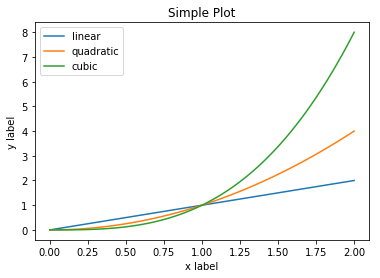

In [13]:
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Simple Plot")

plt.legend()

plt.show()

The first call to ``plt.plot`` will automatically create the necessary
figure and axes to achieve the desired plot.  Subsequent calls to
``plt.plot`` re-use the current axes and each add another line.
Setting the title, legend, and axis labels also automatically use the
current axes and set the title, create the legend, and label the axis
respectively.

:mod:`pylab` is a convenience module that bulk imports
:mod:`matplotlib.pyplot` (for plotting) and :mod:`numpy`
(for mathematics and working with arrays) in a single name space.
pylab is deprecated and its use is strongly discouraged because
of namespace pollution. Use pyplot instead.

For non-interactive plotting it is suggested
to use pyplot to create the figures and then the OO interface for
plotting.


Coding Styles
==================

When viewing this documentation and examples, you will find different
coding styles and usage patterns. These styles are perfectly valid
and have their pros and cons. Just about all of the examples can be
converted into another style and achieve the same results.
The only caveat is to avoid mixing the coding styles for your own code.

<div class="alert alert-info"><h4>Note</h4><p>Developers for matplotlib have to follow a specific style and guidelines.
   See `developers-guide-index`.</p></div>

Of the different styles, there are two that are officially supported.
Therefore, these are the preferred ways to use matplotlib.

For the pyplot style, the imports at the top of your
scripts will typically be::

    import matplotlib.pyplot as plt
    import numpy as np

Then one calls, for example, np.arange, np.zeros, np.pi, plt.figure,
plt.plot, plt.show, etc.  Use the pyplot interface
for creating figures, and then use the object methods for the rest:



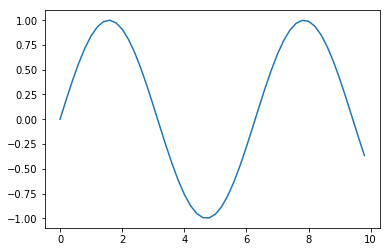

In [5]:
x = np.arange(0, 10, 0.2)
y = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

So, why all the extra typing instead of the MATLAB-style (which relies
on global state and a flat namespace)?  For very simple things like
this example, the only advantage is academic: the wordier styles are
more explicit, more clear as to where things come from and what is
going on.  For more complicated applications, this explicitness and
clarity becomes increasingly valuable, and the richer and more
complete object-oriented interface will likely make the program easier
to write and maintain.


Typically one finds oneself making the same plots over and over
again, but with different data sets, which leads to needing to write
specialized functions to do the plotting.  The recommended function
signature is something like:



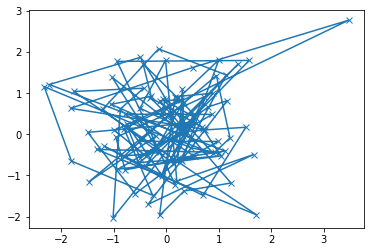

In [6]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

# which you would then use as:

data1, data2, data3, data4 = np.random.randn(4, 100)
fig, ax = plt.subplots(1, 1)
my_plotter(ax, data1, data2, {'marker': 'x'})

or if you wanted to have 2 sub-plots:



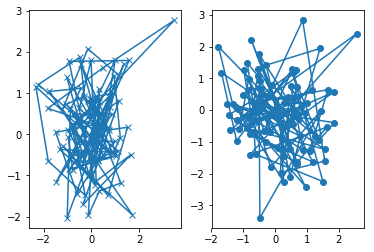

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2)
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})

Again, for these simple examples this style seems like overkill, however
once the graphs get slightly more complex it pays off.

Backends
========


What is a backend?
------------------

A lot of documentation on the website and in the mailing lists refers
to the "backend" and many new users are confused by this term.
matplotlib targets many different use cases and output formats.  Some
people use matplotlib interactively from the python shell and have
plotting windows pop up when they type commands.  Some people run
`Jupyter <https://jupyter.org>`_ notebooks and draw inline plots for
quick data analysis. Others embed matplotlib into graphical user
interfaces like wxpython or pygtk to build rich applications.  Some
people use matplotlib in batch scripts to generate postscript images
from numerical simulations, and still others run web application
servers to dynamically serve up graphs.

To support all of these use cases, matplotlib can target different
outputs, and each of these capabilities is called a backend; the
"frontend" is the user facing code, i.e., the plotting code, whereas the
"backend" does all the hard work behind-the-scenes to make the figure.
There are two types of backends: user interface backends (for use in
pygtk, wxpython, tkinter, qt4, or macosx; also referred to as
"interactive backends") and hardcopy backends to make image files
(PNG, SVG, PDF, PS; also referred to as "non-interactive backends").

There are four ways to configure your backend. If they conflict each other,
the method mentioned last in the following list will be used, e.g. calling
:func:`~matplotlib.use()` will override the setting in your ``matplotlibrc``.


#. The ``backend`` parameter in your ``matplotlibrc`` file (see
   :doc:`/tutorials/introductory/customizing`)::

       backend : WXAgg   # use wxpython with antigrain (agg) rendering

#. Setting the :envvar:`MPLBACKEND` environment variable, either for your
   current shell or for a single script.  On Unix::

        > export MPLBACKEND=module://my_backend
        > python simple_plot.py

        > MPLBACKEND="module://my_backend" python simple_plot.py

   On Windows, only the former is possible::

        > set MPLBACKEND=module://my_backend
        > python simple_plot.py

   Setting this environment variable will override the ``backend`` parameter
   in *any* ``matplotlibrc``, even if there is a ``matplotlibrc`` in your
   current working directory. Therefore setting :envvar:`MPLBACKEND`
   globally, e.g. in your ``.bashrc`` or ``.profile``, is discouraged as it
   might lead to counter-intuitive behavior.

#. If your script depends on a specific backend you can use the
   :func:`~matplotlib.use` function::

      import matplotlib
      matplotlib.use('PS')   # generate postscript output by default

   If you use the :func:`~matplotlib.use` function, this must be done before
   importing :mod:`matplotlib.pyplot`. Calling :func:`~matplotlib.use` after
   pyplot has been imported will have no effect.  Using
   :func:`~matplotlib.use` will require changes in your code if users want to
   use a different backend.  Therefore, you should avoid explicitly calling
   :func:`~matplotlib.use` unless absolutely necessary.

<div class="alert alert-info"><h4>Note</h4><p>Backend name specifications are not case-sensitive; e.g., 'GTK3Agg'
   and 'gtk3agg' are equivalent.</p></div>

With a typical installation of matplotlib, such as from a
binary installer or a linux distribution package, a good default
backend will already be set, allowing both interactive work and
plotting from scripts, with output to the screen and/or to
a file, so at least initially you will not need to use any of the
methods given above.

If, however, you want to write graphical user interfaces, or a web
application server (`howto-webapp`), or need a better
understanding of what is going on, read on. To make things a little
more customizable for graphical user interfaces, matplotlib separates
the concept of the renderer (the thing that actually does the drawing)
from the canvas (the place where the drawing goes).  The canonical
renderer for user interfaces is ``Agg`` which uses the `Anti-Grain
Geometry`_ C++ library to make a raster (pixel) image of the figure.
All of the user interfaces except ``macosx`` can be used with
agg rendering, e.g., ``WXAgg``, ``GTK3Agg``, ``QT4Agg``, ``QT5Agg``,
``TkAgg``.  In addition, some of the user interfaces support other rendering
engines.  For example, with GTK+ 3, you can also select Cairo rendering
(backend ``GTK3Cairo``).

For the rendering engines, one can also distinguish between `vector
<https://en.wikipedia.org/wiki/Vector_graphics>`_ or `raster
<https://en.wikipedia.org/wiki/Raster_graphics>`_ renderers.  Vector
graphics languages issue drawing commands like "draw a line from this
point to this point" and hence are scale free, and raster backends
generate a pixel representation of the line whose accuracy depends on a
DPI setting.

Here is a summary of the matplotlib renderers (there is an eponymous
backed for each; these are *non-interactive backends*, capable of
writing to a file):

=============   ============   ================================================
Renderer        Filetypes      Description
=============   ============   ================================================
:term:`AGG`     :term:`png`    :term:`raster graphics` -- high quality images
                               using the `Anti-Grain Geometry`_ engine
PS              :term:`ps`     :term:`vector graphics` -- Postscript_ output
                :term:`eps`
PDF             :term:`pdf`    :term:`vector graphics` --
                               `Portable Document Format`_
SVG             :term:`svg`    :term:`vector graphics` --
                               `Scalable Vector Graphics`_
:term:`Cairo`   :term:`png`    :term:`raster graphics` and
                :term:`ps`     :term:`vector graphics` -- using the
                :term:`pdf`    `Cairo graphics`_ library
                :term:`svg`
=============   ============   ================================================

And here are the user interfaces and renderer combinations supported;
these are *interactive backends*, capable of displaying to the screen
and of using appropriate renderers from the table above to write to
a file:

========= ================================================================
Backend   Description
========= ================================================================
Qt5Agg    Agg rendering in a :term:`Qt5` canvas (requires PyQt5_).  This
          backend can be activated in IPython with ``%matplotlib qt5``.
ipympl    Agg rendering embedded in a Jupyter widget.  (requires ipympl).
          This backend can be enabled in a Jupyter notebook with
          ``%matplotlib ipympl``.
GTK3Agg   Agg rendering to a :term:`GTK` 3.x canvas (requires PyGObject_,
          and pycairo_ or cairocffi_).  This backend can be activated in
          IPython with ``%matplotlib gtk3``.
macosx    Agg rendering into a Cocoa canvas in OSX.  This backend can be
          activated in IPython with ``%matplotlib osx``.
TkAgg     Agg rendering to a :term:`Tk` canvas (requires TkInter_). This
          backend can be activated in IPython with ``%matplotlib tk``.
nbAgg     Embed an interactive figure in a Jupyter classic notebook.  This
          backend can be enabled in Jupyter notebooks via
          ``%matplotlib notebook``.
WebAgg    On ``show()`` will start a tornado server with an interactive
          figure.
GTK3Cairo Cairo rendering to a :term:`GTK` 3.x canvas (requires PyGObject_,
          and pycairo_ or cairocffi_).
Qt4Agg    Agg rendering to a :term:`Qt4` canvas (requires PyQt4_ or
          ``pyside``).  This backend can be activated in IPython with
          ``%matplotlib qt4``.
WXAgg     Agg rendering to a :term:`wxWidgets` canvas (requires wxPython_ 4).
          This backend can be activated in IPython with ``%matplotlib wx``.
========= ================================================================


ipympl
------

The Jupyter widget ecosystem is moving too fast to support directly in
Matplotlib.  To install ipympl

.. code-block:: bash

   pip install ipympl
   jupyter nbextension enable --py --sys-prefix ipympl

or

.. code-block:: bash

   conda install ipympl -c conda-forge

See `jupyter-matplotlib <https://github.com/matplotlib/jupyter-matplotlib>`__
for more details.

GTK and Cairo
-------------

`GTK3` backends (*both* `GTK3Agg` and `GTK3Cairo`) depend on Cairo
(pycairo>=1.11.0 or cairocffi).

How do I select PyQt4 or PySide?
--------------------------------

The `QT_API` environment variable can be set to either `pyqt` or `pyside`
to use `PyQt4` or `PySide`, respectively.

Since the default value for the bindings to be used is `PyQt4`,
:mod:`matplotlib` first tries to import it, if the import fails, it tries to
import `PySide`.


What is interactive mode?
===================================

Use of an interactive backend (see `what-is-a-backend`)
permits--but does not by itself require or ensure--plotting
to the screen.  Whether and when plotting to the screen occurs,
and whether a script or shell session continues after a plot
is drawn on the screen, depends on the functions and methods
that are called, and on a state variable that determines whether
matplotlib is in "interactive mode".  The default Boolean value is set
by the :file:`matplotlibrc` file, and may be customized like any other
configuration parameter (see :doc:`/tutorials/introductory/customizing`).  It
may also be set via :func:`matplotlib.interactive`, and its
value may be queried via :func:`matplotlib.is_interactive`.  Turning
interactive mode on and off in the middle of a stream of plotting
commands, whether in a script or in a shell, is rarely needed
and potentially confusing, so in the following we will assume all
plotting is done with interactive mode either on or off.

<div class="alert alert-info"><h4>Note</h4><p>Major changes related to interactivity, and in particular the
   role and behavior of :func:`~matplotlib.pyplot.show`, were made in the
   transition to matplotlib version 1.0, and bugs were fixed in
   1.0.1.  Here we describe the version 1.0.1 behavior for the
   primary interactive backends, with the partial exception of
   *macosx*.</p></div>

Interactive mode may also be turned on via :func:`matplotlib.pyplot.ion`,
and turned off via :func:`matplotlib.pyplot.ioff`.

<div class="alert alert-info"><h4>Note</h4><p>Interactive mode works with suitable backends in ipython and in
   the ordinary python shell, but it does *not* work in the IDLE IDE.
   If the default backend does not support interactivity, an interactive
   backend can be explicitly activated using any of the methods discussed in `What is a backend?`_.</p></div>


Interactive example
--------------------

From an ordinary python prompt, or after invoking ipython with no options,
try this::

    import matplotlib.pyplot as plt
    plt.ion()
    plt.plot([1.6, 2.7])

Assuming you are running version 1.0.1 or higher, and you have
an interactive backend installed and selected by default, you should
see a plot, and your terminal prompt should also be active; you
can type additional commands such as::

    plt.title("interactive test")
    plt.xlabel("index")

and you will see the plot being updated after each line.  Since version 1.5,
modifying the plot by other means *should* also automatically
update the display on most backends. Get a reference to the :class:`~matplotlib.axes.Axes` instance,
and call a method of that instance::

    ax = plt.gca()
    ax.plot([3.1, 2.2])

If you are using certain backends (like `macosx`), or an older version
of matplotlib, you may not see the new line added to the plot immediately.
In this case, you need to explicitly call :func:`~matplotlib.pyplot.draw`
in order to update the plot::

    plt.draw()


Non-interactive example
-----------------------

Start a fresh session as in the previous example, but now
turn interactive mode off::

    import matplotlib.pyplot as plt
    plt.ioff()
    plt.plot([1.6, 2.7])

Nothing happened--or at least nothing has shown up on the
screen (unless you are using *macosx* backend, which is
anomalous).  To make the plot appear, you need to do this::

    plt.show()

Now you see the plot, but your terminal command line is
unresponsive; the :func:`show()` command *blocks* the input
of additional commands until you manually kill the plot
window.

What good is this--being forced to use a blocking function?
Suppose you need a script that plots the contents of a file
to the screen.  You want to look at that plot, and then end
the script.  Without some blocking command such as show(), the
script would flash up the plot and then end immediately,
leaving nothing on the screen.

In addition, non-interactive mode delays all drawing until
show() is called; this is more efficient than redrawing
the plot each time a line in the script adds a new feature.

Prior to version 1.0, show() generally could not be called
more than once in a single script (although sometimes one
could get away with it); for version 1.0.1 and above, this
restriction is lifted, so one can write a script like this:



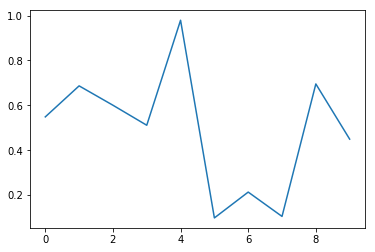

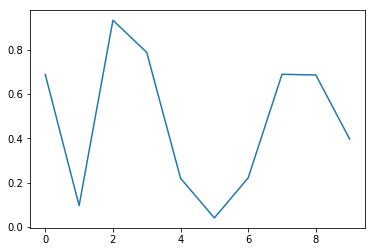

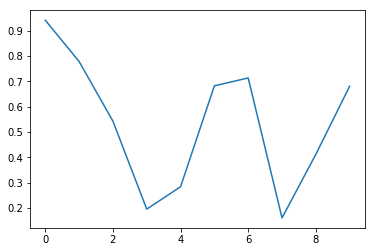

In [8]:
import numpy as np
import matplotlib.pyplot as plt

plt.ioff()
for i in range(3):
    plt.plot(np.random.rand(10))
    plt.show()

which makes three plots, one at a time.

Summary
-------

In interactive mode, pyplot functions automatically draw
to the screen.

When plotting interactively, if using
object method calls in addition to pyplot functions, then
call :func:`~matplotlib.pyplot.draw` whenever you want to
refresh the plot.

Use non-interactive mode in scripts in which you want to
generate one or more figures and display them before ending
or generating a new set of figures.  In that case, use
:func:`~matplotlib.pyplot.show` to display the figure(s) and
to block execution until you have manually destroyed them.


Performance
===========

Whether exploring data in interactive mode or programmatically
saving lots of plots, rendering performance can be a painful
bottleneck in your pipeline. Matplotlib provides a couple
ways to greatly reduce rendering time at the cost of a slight
change (to a settable tolerance) in your plot's appearance.
The methods available to reduce rendering time depend on the
type of plot that is being created.

Line segment simplification
---------------------------

For plots that have line segments (e.g. typical line plots,
outlines of polygons, etc.), rendering performance can be
controlled by the ``path.simplify`` and
``path.simplify_threshold`` parameters in your
``matplotlibrc`` file (see
:doc:`/tutorials/introductory/customizing` for
more information about the ``matplotlibrc`` file).
The ``path.simplify`` parameter is a boolean indicating whether
or not line segments are simplified at all. The
``path.simplify_threshold`` parameter controls how much line
segments are simplified; higher thresholds result in quicker
rendering.

The following script will first display the data without any
simplification, and then display the same data with simplification.
Try interacting with both of them::

  import numpy as np
  import matplotlib.pyplot as plt
  import matplotlib as mpl

  # Setup, and create the data to plot
  y = np.random.rand(100000)
  y[50000:] *= 2
  y[np.logspace(1, np.log10(50000), 400).astype(int)] = -1
  mpl.rcParams['path.simplify'] = True

  mpl.rcParams['path.simplify_threshold'] = 0.0
  plt.plot(y)
  plt.show()

  mpl.rcParams['path.simplify_threshold'] = 1.0
  plt.plot(y)
  plt.show()

Matplotlib currently defaults to a conservative simplification
threshold of ``1/9``. If you want to change your default settings
to use a different value, you can change your ``matplotlibrc``
file.  Alternatively, you could create a new style for
interactive plotting (with maximal simplification) and another
style for publication quality plotting (with minimal
simplification) and activate them as necessary. See
:doc:`/tutorials/introductory/customizing` for
instructions on how to perform these actions.

The simplification works by iteratively merging line segments
into a single vector until the next line segment's perpendicular
distance to the vector (measured in display-coordinate space)
is greater than the ``path.simplify_threshold`` parameter.

<div class="alert alert-info"><h4>Note</h4><p>Changes related to how line segments are simplified were made
  in version 2.1. Rendering time will still be improved by these
  parameters prior to 2.1, but rendering time for some kinds of
  data will be vastly improved in versions 2.1 and greater.</p></div>

Marker simplification
---------------------

Markers can also be simplified, albeit less robustly than
line segments. Marker simplification is only available
to :class:`~matplotlib.lines.Line2D` objects (through the
``markevery`` property). Wherever
:class:`~matplotlib.lines.Line2D` construction parameter
are passed through, such as
:func:`matplotlib.pyplot.plot` and
:meth:`matplotlib.axes.Axes.plot`, the ``markevery``
parameter can be used::

  plt.plot(x, y, markevery=10)

The markevery argument allows for naive subsampling, or an
attempt at evenly spaced (along the *x* axis) sampling. See the
:doc:`/gallery/lines_bars_and_markers/markevery_demo`
for more information.

Splitting lines into smaller chunks
-----------------------------------

If you are using the Agg backend (see `what-is-a-backend`),
then you can make use of the ``agg.path.chunksize`` rc parameter.
This allows you to specify a chunk size, and any lines with
greater than that many vertices will be split into multiple
lines, each of which have no more than ``agg.path.chunksize``
many vertices. (Unless ``agg.path.chunksize`` is zero, in
which case there is no chunking.) For some kind of data,
chunking the line up into reasonable sizes can greatly
decrease rendering time.

The following script will first display the data without any
chunk size restriction, and then display the same data with
a chunk size of 10,000. The difference can best be seen when
the figures are large, try maximizing the GUI and then
interacting with them::

  import numpy as np
  import matplotlib.pyplot as plt
  import matplotlib as mpl
  mpl.rcParams['path.simplify_threshold'] = 1.0

  # Setup, and create the data to plot
  y = np.random.rand(100000)
  y[50000:] *= 2
  y[np.logspace(1,np.log10(50000), 400).astype(int)] = -1
  mpl.rcParams['path.simplify'] = True

  mpl.rcParams['agg.path.chunksize'] = 0
  plt.plot(y)
  plt.show()

  mpl.rcParams['agg.path.chunksize'] = 10000
  plt.plot(y)
  plt.show()

Using the *fast* style
----------------------

The *fast* style can be used to automatically set
simplification and chunking parameters to reasonable
settings to speed up plotting large amounts of data.
It can be used simply by running::

  import matplotlib.style as mplstyle
  mplstyle.use('fast')

It is very light weight, so it plays nicely with other
styles, just make sure the fast style is applied last
so that other styles do not overwrite the settings::

  mplstyle.use(['dark_background', 'ggplot', 'fast'])

